In [155]:
#!/usr/bin/env python
# _*_ coding: utf-8 _*_


import cv2
import numpy as np
import matplotlib.pyplot as plt


"""
    Non-max Suppression Algorithm

    @param list  Object candidate bounding boxes
    @param list  Confidence score of bounding boxes
    @param float IoU threshold

    @return Rest boxes after nms operation
"""
def nms(bounding_boxes, confidence_score, labels, threshold):
    # If no bounding boxes, return empty list
    if len(bounding_boxes) == 0:
        return []


    # Bounding boxes
    boxes = np.array(bounding_boxes)

    # Confidence scores of bounding boxes
    score = np.array(confidence_score)

    # labels
    labels = np.array(labels)

    
    # Picked bounding boxes
    picked_boxes = []
    picked_score = []

    unique_labels = np.unique(labels)

    mask = [labels == i for i in unique_labels]

    for m in mask:
      
      sub_boxes = boxes[m]
      sub_score = score[m]

     

      # coordinates of bounding boxes
      start_x = sub_boxes[:, 0]
      start_y = sub_boxes[:, 1]
      end_x = sub_boxes[:, 2]
      end_y = sub_boxes[:, 3]

      


      # Compute areas of bounding boxes
      areas = (end_x - start_x + 1) * (end_y - start_y + 1)
    

      # Sort by confidence score of bounding boxes
      order = np.argsort(sub_score)
      

      # Iterate bounding boxes
      while order.size > 0:
          # The index of largest confidence score
          index = order[-1]

        

          # Pick the bounding box with largest confidence score
          picked_boxes.append(sub_boxes[index])
          picked_score.append(sub_score[index])

          # Compute ordinates of intersection-over-union(IOU)
          #x1 returns max of n-1 x1 as it brodcast find max one by one
          x1 = np.maximum(start_x[index], start_x[order[:-1]])
          x2 = np.minimum(end_x[index], end_x[order[:-1]])
          y1 = np.maximum(start_y[index], start_y[order[:-1]])
          y2 = np.minimum(end_y[index], end_y[order[:-1]])

          # Compute areas of intersection-over-union
          w = np.maximum(0.0, x2 - x1 + 1)
          h = np.maximum(0.0, y2 - y1 + 1)
          intersection = w * h

          

          # Compute the ratio between intersection and union
          ratio = intersection / (areas[index] + areas[order[:-1]] - intersection)

          left = np.where(ratio < threshold)

          # continue with those who are not so close to main frame.
          order = order[left]

    return picked_boxes, picked_score




In [156]:
def draw_bounding_box(image,bounding_boxes,confidence_score):
  # Draw parameters
  font = cv2.FONT_HERSHEY_SIMPLEX
  font_scale = 1
  thickness = 2
  
  for (start_x, start_y, end_x, end_y), confidence in zip(bounding_boxes, confidence_score):
      print("confidence : ",confidence)
      (w, h), baseline = cv2.getTextSize(str(confidence), font, font_scale, thickness)
      cv2.rectangle(image, (start_x, start_y - (2 * baseline + 5)), (start_x + w, start_y), (0, 255, 255), -1)
      cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
      cv2.putText(image, str(confidence), (start_x, start_y), font, font_scale, (0, 0, 0), thickness)
  
  return image

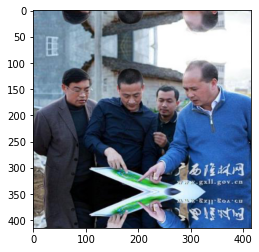

In [157]:
# Image name
image_name = 'hard_hat_workers8.png'



# Read image
image = cv2.imread(image_name)
image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_)
#plt.show()


confidence :  0.9
confidence :  0.75
confidence :  0.8


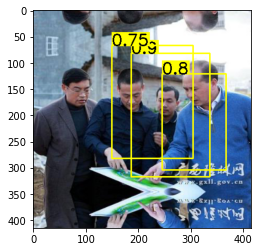

In [158]:
# Copy image as original
org = image.copy()

# IoU threshold
threshold = 0.4

org_drawed = draw_bounding_box(org,bounding_boxes,confidence_score)

# Read image
org_drawed_ = cv2.cvtColor(org_drawed, cv2.COLOR_BGR2RGB)
plt.imshow(org_drawed_)

In [159]:
# Run non-max suppression algorithm
# Bounding boxes

bounding_boxes = [[187, 82, 337, 317], [150, 67, 305, 282], [246, 121, 368, 304]]
confidence_score = [0.9, 0.75, 0.8]
labels = [0,0,1]

picked_boxes, picked_score = nms(bounding_boxes, confidence_score, labels, threshold)
picked_boxes,picked_score

([array([187,  82, 337, 317]), array([246, 121, 368, 304])], [0.9, 0.8])

confidence :  0.9
confidence :  0.8


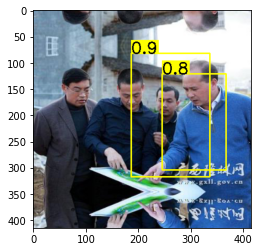

In [161]:
image = cv2.imread(image_name)
image_drawed = draw_bounding_box(image,picked_boxes,picked_score)


image_drawed_ = cv2.cvtColor(image_drawed,cv2.COLOR_BGR2RGB)
plt.imshow(image_drawed_)